## Notebook for data analysis and curation of the dataset

### Data analysis of Full Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

flora_data = pd.read_csv('../src/flora_data/cleaned_flora_species.csv', sep=',', header=0)
flora_data.head()

,Scientific Name,Common Name,Species ID,Link,Plant Type,Light Preference,Water Preference,Drought Tolerant?,Native to SG?,Fruit Bearing?,...,Hazard,Attracted Animals,Native habitat,Mature Leaf Colour,Young Flush Leaf Colour,Leaf Area Index,Growth Rate,Trunk Texture,Trunk Colour,Leaf Texture
0,Abelia × grandiflora (Planch. & Linden) Traub,Glossy abelia,4055,https://www.nparks.gov.sg/florafaunaweb/flora/...,Shrub,Full Sun,Moderate Water,False,False,False,...,-,Butterfly-Attracting,Terrestrial,Green,-,-,Moderate,NaN,NaN,Medium
1,Abelia × grandiflora 'Francis Mason',Golden Abelia,3463,https://www.nparks.gov.sg/florafaunaweb/flora/...,Shrub,"Full Sun, Semi Shade",Moderate Water,False,False,False,...,-,Butterfly-Attracting,-,"Green, Yellow / Golden",Red,4.5 (Shrub & Groundcover - Dicot),Moderate,NaN,NaN,Medium
2,Abelia × grandiflora 'Kaleidoscope',Kaleidoscope Abelia,5038,https://www.nparks.gov.sg/florafaunaweb/flora/...,Shrub,Full Sun,Moderate Water,False,False,False,...,-,Butterfly-Attracting,Terrestrial,Green - Light Green,Red,-,Moderate,NaN,NaN,Medium
3,Abelia × grandiflora 'Variegata',-,4056,https://www.nparks.gov.sg/florafaunaweb/flora/...,Shrub,"Full Sun, Semi Shade",Moderate Water,False,False,False,...,-,-,Terrestrial,-,-,-,Moderate,NaN,NaN,-
4,Abelmoschus esculentus (L.) Moench,Lady's Fingers,1581,https://www.nparks.gov.sg/florafaunaweb/flora/...,"Herbaceous Plant, Shrub",Full Sun,Moderate Water,False,False,True,...,"Spines/Thorns - Stem/Branch, Spines/Thorns - Leaf",-,-,Green,Green,-,Moderate,NaN,NaN,Coarse


{'tree': 1497, 'shrub': 1305, 'both': 198}


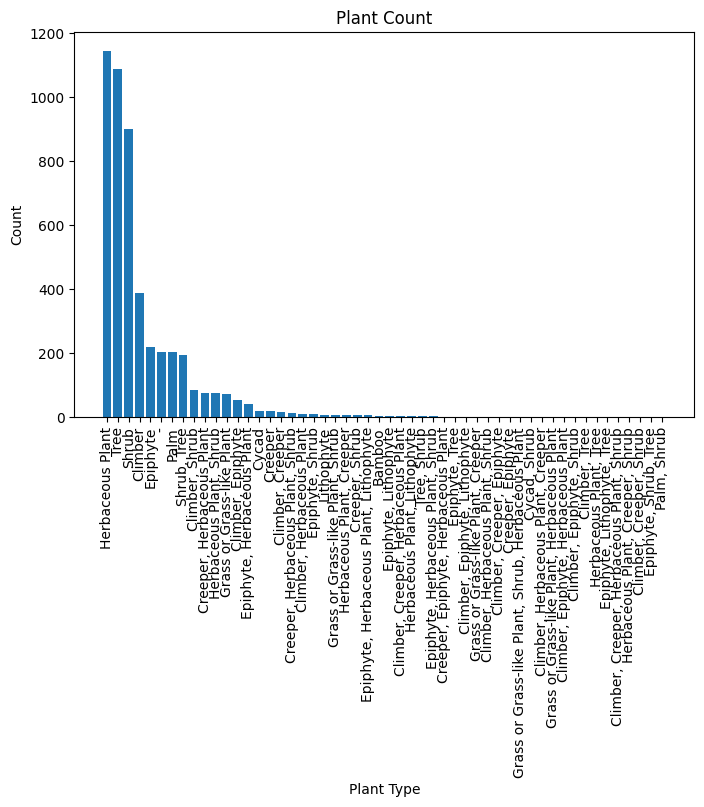

In [2]:
# Plant Types Count
plant_counts = flora_data['Plant Type'].value_counts()
tree_shrub_count = {'tree':0, 'shrub': 0, 'both': 0}

for plant_types, counts in plant_counts.items():
    if 'Shrub' in plant_types and 'Tree' in plant_types:
        tree_shrub_count['both'] += counts

    if 'Shrub' in plant_types:
        tree_shrub_count['shrub'] += counts

    if 'Tree' in plant_types or 'Palm' in plant_types:
        tree_shrub_count['tree'] += counts

print(tree_shrub_count)

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(plant_counts.index, plant_counts.values)
ax.set_xlabel('Plant Type')
ax.set_ylabel('Count')
ax.set_title('Plant Count')
plt.xticks(rotation=90)
plt.show()

In [3]:
### Analysis of different attributes for all Tree Class
tree_data = flora_data[flora_data['Plant Type'].str.contains('Tree|Palm', case=False)]
print(tree_data.shape)

tree_data_characteristics = {}
labels_to_check = ["Light Preference", "Water Preference","Drought Tolerant?", "Growth Rate", "Native to SG?", "Attracted Animals", "Fruit Bearing?"]

for label in labels_to_check:
    data_counts = tree_data[label].value_counts()

    for type, counts in data_counts.items():
        type_list = str(type).split(",")
        for data_type in type_list:
            # Retrieve list for the type
            data = tree_data_characteristics.get(label, {})
            # Retrieve value
            type_count = data.get(data_type.strip(), 0)
            data[data_type.strip()] = type_count + counts
            tree_data_characteristics[label] = data


for label, value in tree_data_characteristics.items():
    print(label, value)

(1497, 23)
Light Preference {'Full Sun': 1388, 'Semi Shade': 446, 'Full Shade': 20, '-': 2}
Water Preference {'Moderate Water': 1425, 'Lots of Water': 148, 'Little Water': 51, 'Occasional Misting': 3, '-': 3}
Drought Tolerant? {'False': 1373, 'True': 124}
Growth Rate {'Moderate': 1274, 'Fast to Moderate': 65, 'Slow': 57, 'Moderate to Slow': 42, 'Fast': 42, '-': 20}
Native to SG? {'False': 980, 'True': 517}
Attracted Animals {'-': 1155, 'Bird-Attracting': 142, 'Bird-Attracting (Fruits)': 60, 'Butterfly Host Plant': 43, 'Butterfly-Attracting': 56, 'Bat Food': 23, 'Caterpillar Moth Food Plant': 29, 'Bee-Attracting': 30, 'Butterfly Host Plant (Leaves)': 17, 'Caterpillar Moth Food Plant (Leaves)': 8, 'Bird-Attracting (Flowers)': 12, 'Butterfly-Attracting (Flower Nectar)': 13, 'Moth Food Plant': 7, 'Bird-Attracting (Seeds)': 3, 'Bat Food (Fruits)': 3, 'Moth Food Plant (Flower Nectar)': 2, 'Bird-Attracting (Fruits': 5, 'Flowers)': 2, 'Associated with: Anthracoceros albirostris)': 1, 'Butterfl

In [4]:
### Analysis of different attributes for all Shrub Class
shrub_data = flora_data[flora_data['Plant Type'].str.contains('Shrub', case=False)]
print(shrub_data.shape)

shrub_data_characteristics = {}
labels_to_check = ["Light Preference", "Water Preference","Drought Tolerant?", "Growth Rate", "Native to SG?", "Attracted Animals", "Fruit Bearing?", "Fragrant Plant?", "Leaf Texture"]

for label in labels_to_check:
    data_counts = shrub_data[label].value_counts()

    for type, counts in data_counts.items():
        type_list = str(type).split(",")
        for data_type in type_list:
            # Retrieve list for the type
            data = shrub_data_characteristics.get(label, {})
            # Retrieve value
            type_count = data.get(data_type.strip(), 0)
            data[data_type.strip()] = type_count + counts
            shrub_data_characteristics[label] = data


for label, value in shrub_data_characteristics.items():
    print(label, value)

(1305, 23)
Light Preference {'Full Sun': 1055, 'Semi Shade': 660, 'Full Shade': 47}
Water Preference {'Moderate Water': 1053, 'Little Water': 172, 'Lots of Water': 191, 'Occasional Misting': 66}
Drought Tolerant? {'False': 1108, 'True': 197}
Growth Rate {'-': 721, 'Moderate': 367, 'Fast': 119, 'Fast to Moderate': 72, 'Slow': 21, 'Moderate to Slow': 5, 'Very Fast': 1}
Native to SG? {'False': 1153, 'True': 152}
Attracted Animals {'-': 963, 'Butterfly-Attracting': 134, 'Bird-Attracting': 91, 'Butterfly-Attracting (Flower Nectar)': 47, 'Bird-Attracting (Fruits)': 34, 'Butterfly Host Plant': 43, 'Bee-Attracting': 57, 'Bird-Attracting (Flowers)': 21, 'Moth Food Plant': 9, 'Butterfly Host Plant (Leaves)': 10, 'Caterpillar Moth Food Plant (Leaves)': 2, 'Bird-Attracting (Seeds)': 1, 'Butterfly Host Plant (Leaves': 5, 'Associated with: Megisba malaya)': 1, 'Bird-Attracting (Fruits': 3, 'Associated with: Pycnonotus goiavier)': 1, 'Caterpillar Moth Food Plant': 8, 'Butterfly-Attracting (': 1, 'Flo

### Data Analysis of Filtered Data

In [5]:
# Removing incomplete data

# The values are different because there is tree,shrub data
tree_shrub_data = flora_data[flora_data['Plant Type'].str.contains('Tree|Shrub|Palm', case=False)]
print(tree_shrub_data.shape)

# Filter empty / incomplete data
# Note: For Attracted animals, Hazard, Fragrant Plant -> '-' means False 
invalid_data_list = ['Maximum Height', 'Flower Colour', 'Native habitat', 'Mature Leaf Colour', 'Leaf Area Index', 'Growth Rate', 'Trunk Texture', 'Trunk Colour', 'Leaf Texture']
# Remove any '-' which shows no data
# Filter rows where any of the specified columns contain exactly '-'
filtered_tree_shrub_data = tree_shrub_data[
    ~tree_shrub_data[invalid_data_list].apply(lambda row: (row.astype(str) == '-').any(), axis=1)
]

print(filtered_tree_shrub_data['Plant Type'].value_counts())
print(filtered_tree_shrub_data.shape)

(2603, 23)
Plant Type
Tree                                 74
Shrub                                74
Shrub, Tree                          14
Herbaceous Plant, Shrub              13
Creeper, Herbaceous Plant, Shrub      4
Climber, Shrub                        4
Epiphyte, Herbaceous Plant, Shrub     2
Epiphyte, Shrub                       1
Grass or Grass-like Plant, Shrub      1
Palm                                  1
Creeper, Shrub                        1
Name: count, dtype: int64
(189, 23)


In [6]:
### Analysis of different attributes for all Tree Class
tree_data = filtered_tree_shrub_data[filtered_tree_shrub_data['Plant Type'].str.contains('Tree|Palm', case=False)]
print(tree_data.shape)

tree_data_characteristics = {}
labels_to_check = ["Light Preference", "Water Preference","Drought Tolerant?", "Growth Rate", "Native to SG?", "Attracted Animals", "Fruit Bearing?"]

for label in labels_to_check:
    data_counts = tree_data[label].value_counts()

    for type, counts in data_counts.items():
        type_list = str(type).split(",")
        for data_type in type_list:
            # Retrieve list for the type
            data = tree_data_characteristics.get(label, {})
            # Retrieve value
            type_count = data.get(data_type.strip(), 0)
            data[data_type.strip()] = type_count + counts
            tree_data_characteristics[label] = data


for label, value in tree_data_characteristics.items():
    print(label, value)

(89, 23)
Light Preference {'Full Sun': 88, 'Semi Shade': 13}
Water Preference {'Moderate Water': 85, 'Lots of Water': 12, 'Little Water': 7}
Drought Tolerant? {'False': 69, 'True': 20}
Growth Rate {'Moderate': 66, 'Fast': 11, 'Fast to Moderate': 6, 'Slow': 6, 'Moderate to Slow': 1}
Native to SG? {'False': 63, 'True': 26}
Attracted Animals {'-': 51, 'Bird-Attracting': 17, 'Butterfly-Attracting': 11, 'Bird-Attracting (Fruits)': 5, 'Butterfly Host Plant': 6, 'Bee-Attracting': 7, 'Butterfly-Attracting (Flower Nectar)': 1, 'Bird-Attracting (Seeds)': 1, 'Bird-Attracting (Flowers)': 2, 'Caterpillar Moth Food Plant (Leaves)': 3, 'Bat Food': 3, 'Caterpillar Moth Food Plant (Leaves': 1, 'Associated with (Attacus atlas': 1, 'Clethrogyna turbata': 1, 'and Strepsicrates rhothia.)': 1, 'Caterpillar Moth Food Plant': 2, 'Butterfly Host Plant (Leaves': 2, 'Associated with: Eurema  hecabe contubernalis (Moore': 1, '1886)': 1, 'Lexias pardalis)': 1, 'Associated with: Odontoptilum angulatum': 1, 'Rapala 

In [7]:
### Analysis of different attributes for all Shrub Class
shrub_data = filtered_tree_shrub_data[filtered_tree_shrub_data['Plant Type'].str.contains('Shrub', case=False)]
print(shrub_data.shape)

shrub_data_characteristics = {}
labels_to_check = ["Light Preference", "Water Preference","Drought Tolerant?", "Growth Rate", "Native to SG?", "Attracted Animals", "Fruit Bearing?", "Fragrant Plant?", "Leaf Texture"]

for label in labels_to_check:
    data_counts = shrub_data[label].value_counts()

    for type, counts in data_counts.items():
        type_list = str(type).split(",")
        for data_type in type_list:
            # Retrieve list for the type
            data = shrub_data_characteristics.get(label, {})
            # Retrieve value
            type_count = data.get(data_type.strip(), 0)
            data[data_type.strip()] = type_count + counts
            shrub_data_characteristics[label] = data


for label, value in shrub_data_characteristics.items():
    print(label, value)

(114, 23)
Light Preference {'Full Sun': 98, 'Semi Shade': 64, 'Full Shade': 4}
Water Preference {'Moderate Water': 96, 'Lots of Water': 22, 'Little Water': 15, 'Occasional Misting': 3}
Drought Tolerant? {'False': 91, 'True': 23}
Growth Rate {'Moderate': 65, 'Fast': 32, 'Fast to Moderate': 11, 'Slow': 5, 'Moderate to Slow': 2}
Native to SG? {'False': 103, 'True': 11}
Attracted Animals {'-': 72, 'Butterfly-Attracting': 18, 'Bird-Attracting': 11, 'Bee-Attracting': 9, 'Butterfly Host Plant': 9, 'Bird-Attracting (Flowers)': 3, 'Butterfly-Attracting (Flower Nectar)': 9, 'Butterfly Host Plant (Associated with: )': 1, 'Moth Food Plant (Flower Nectar)': 1, 'Bird-Attracting (Fruits)': 1, 'Butterfly Host Plant (Associated with: Junonia atlites)': 1, 'Butterfly Host Plant (Leaves)': 1, 'Butterfly Host Plant (Leaves': 2, 'Associated with: Hypolimnas bolina jacintha': 1, 'Doleschallia bisaltide': 1, 'Junonia orithya ssp wallacei)': 1, 'Associated with: Eurema  hecabe contubernalis (Moore': 1, '1886)

### Data Analysis on Selected Dataset

In [8]:
def analyse_data_attributes(selected_dataset, attributes_list):

    data_attributes = {"Tree": {}, "Herbaceous Plant":{}, "Shrub": {}, "Palm": {}}

    for index, row in selected_dataset.iterrows():
        plant_type = row['Plant Type']
        # Append Palm under tree category
        if 'Palm' in plant_type and 'Tree' not in plant_type:
            plant_type += ", Tree"
        plant_type_list = plant_type.split(',')

        for type in plant_type_list:
            type = type.strip()
            if type in data_attributes.keys():
                type_count = data_attributes[type].get('Count', 0)
                data_attributes[type]['Count'] = type_count + 1

        for attribute in attributes_list:
            row_data = row[attribute]
            row_attributes_list = str(row_data).split(",")

            for type in plant_type_list:
                type = type.strip()
                if type in data_attributes.keys():
                    attributes_dict = data_attributes[type].get(attribute, {})
                    
                    for attribute_type in row_attributes_list:
                        attribute_type = attribute_type.strip()
                        attribute_count = attributes_dict.get(attribute_type, 0)
                        attributes_dict[attribute_type] = attribute_count + 1
                        data_attributes[type][attribute] = attributes_dict
        
    return data_attributes

In [12]:
selected_dataset = filtered_tree_shrub_data.sample(n=30, random_state=None)


In [9]:
# Create dataset with specific seed
seed = 4625

selected_dataset = filtered_tree_shrub_data.sample(n=30, random_state=seed)
attributes_list = selected_dataset.columns[5:]

selected_data_attributes = analyse_data_attributes(selected_dataset, attributes_list)

for label, value in selected_data_attributes.items():
    print(label)
    for attribute, attribute_value in value.items():
        print(attribute, attribute_value)

Tree
Count 14
Light Preference {'Full Sun': 14, 'Semi Shade': 2}
Water Preference {'Moderate Water': 14, 'Lots of Water': 1}
Drought Tolerant? {'False': 11, 'True': 3}
Native to SG? {'False': 9, 'True': 5}
Fruit Bearing? {'True': 5, 'False': 9}
Fragrant Plant? {'True': 8, 'False': 6}
Maximum Height {'20.0': 3, '10.0': 1, '50.0': 1, '36': 1, '22.0': 1, '35.0': 2, '12.0': 1, '6.0': 1, '28.0': 1, '30.0': 1, '40.0': 1}
Flower Colour {'Orange': 1, 'Cream / Off-White': 3, 'Pink': 5, 'White': 7, 'Yellow / Golden': 3, 'Green - Light Green': 1, 'Purple': 1, 'Green': 4, 'Red': 1}
Hazard {'-': 12, 'Irritant - Contact Allergy': 1, 'Large Heavy Fruits': 1, 'Irritant - Sap': 1, 'Irritant - Nasal Allergy': 1}
Attracted Animals {'-': 10, 'Bird-Attracting': 2, 'Caterpillar Moth Food Plant': 1, 'Bird-Attracting (Fruits)': 1, 'Butterfly-Attracting': 2, 'Butterfly Host Plant': 1}
Native habitat {'Terrestrial (Monsoon Forest)': 1, 'Terrestrial (Riverine)': 2, 'Terrestrial': 3, 'Terrestrial (Primary Rainfor

In [ ]:
# Updates to ensure all None is a string instead (if not it will be empty in the csv)
selected_dataset = selected_dataset.where(pd.notnull(selected_dataset), 'None')
selected_dataset.to_csv('../src/flora_data/dataset.csv', index=False)